In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('TABLE_III._Deaths_in_122_U.S._cities.csv')

TABLE III. Deaths in 122 U.S. cities â 2016. 122 Cities Mortality Reporting System â Each week, the vital statistics offices of 122 cities across the United States report the total number of death certificates processed and the number of those for which pneumonia or influenza was listed as the underlying or contributing cause of death by age group (Under 28 days, 28 days â1 year, 1-14 years, 15-24 years, 25-44 years, 45-64 years, 65-74 years, 75-84 years, and â¥ 85 years). FOOTNOTE: U: Unavailable. â: No reported cases. * Mortality data in this table are voluntarily reported from 122 cities in the United States, most of which have populations of 100,000 or more. A death is reported by the place of its occurrence and by the week that the death certificate was filed. Fetal deaths are not included. â  Pneumonia and influenza. Â§ Total includes unknown ages.

https://catalog.data.gov/dataset/table-iii-deaths-in-122-u-s-cities

In [3]:
df.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), ≥65","All causes, by age (years), ≥65, flag","All causes, by age (years), 45–64","All causes, by age (years), 45–64, flag","All causes, by age (years), 25–44","All causes, by age (years), 25–44, flag","All causes, by age (years), 1–24","All causes, by age (years), 1–24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I† Total,"P&I† Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


In [4]:
df_total = df.groupby('Reporting Area').sum()
df_total.head()

,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), ≥65","All causes, by age (years), 45–64","All causes, by age (years), 25–44","All causes, by age (years), 1–24","All causes, by age (years), LT 1",P&I† Total,Location 2
Reporting Area,,,,,,,,,,
"Akron, OH",78624,780,2139.0,1334.0,508.0,183.0,59.0,55.0,155.0,NaN
"Albany, NY",78624,780,2021.0,1432.0,427.0,88.0,29.0,43.0,119.0,NaN
"Albuquerque, NM",78624,780,4839.0,3302.0,1042.0,338.0,107.0,50.0,365.0,NaN
"Allentown, PA",78624,780,1173.0,887.0,213.0,47.0,18.0,7.0,39.0,NaN
"Atlanta, GA",78624,780,6126.0,3712.0,1646.0,503.0,179.0,86.0,336.0,NaN


In [5]:
city_list = list(df.iloc[10:132, 0])
cities = df_total.loc[city_list,:].iloc[:, 3:8].loc[::-1]
cities.columns=['age ≥65','age 45–64','age 25–44','age 1–24','age <1']
# rearrange the columns
cols =['age <1','age 1–24','age 25–44','age 45–64','age ≥65']
cities= cities[cols].sort_index().dropna()

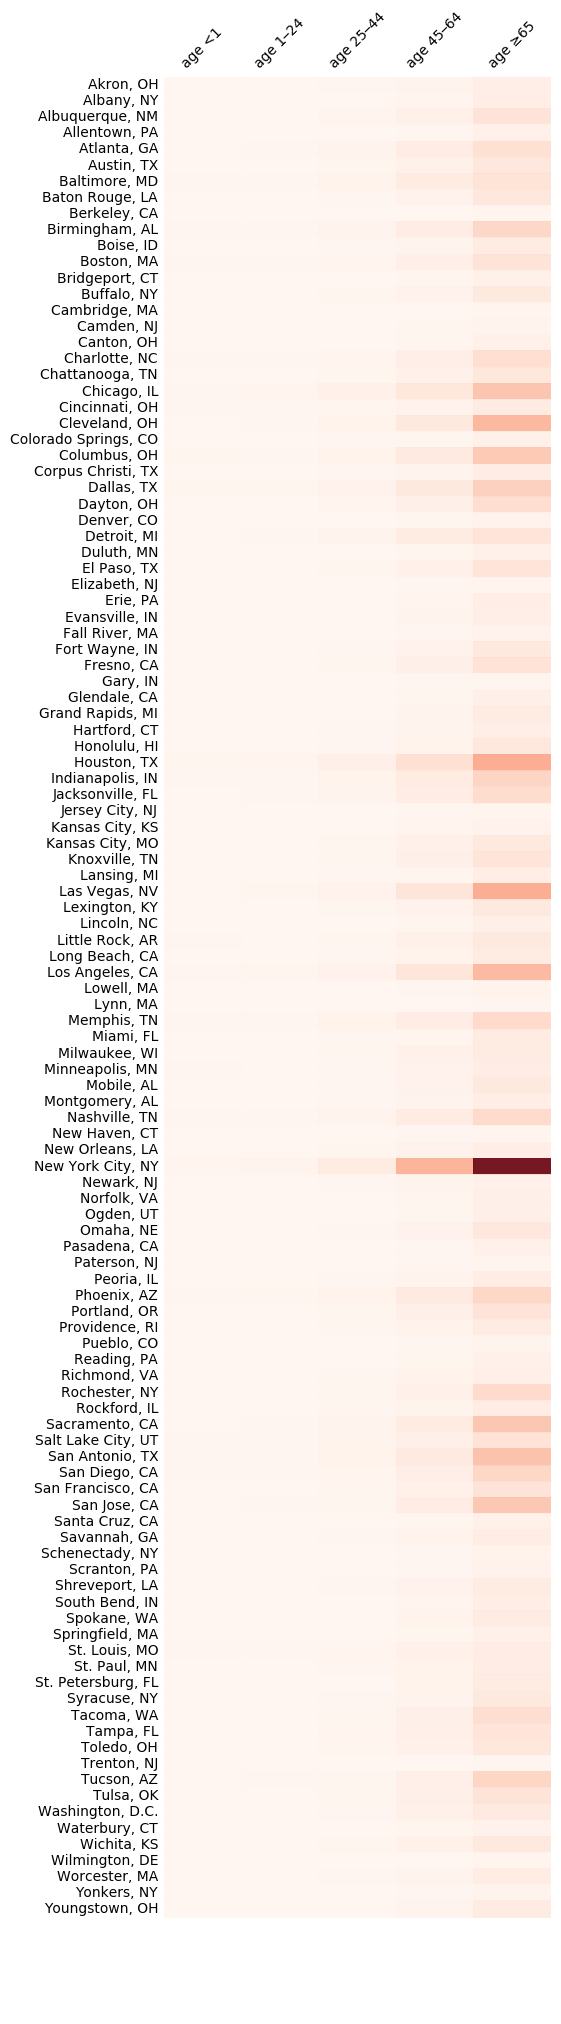

In [6]:
# Plotting
fig, ax = plt.subplots()
heatmap = ax.pcolor(cities, cmap=plt.cm.Reds, alpha=0.9)
#size of the figure
fig = plt.gcf()
fig.set_size_inches(5, 25)

ax.set_frame_on(False) # remove the frame
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(cols, minor=False)
ax.set_yticklabels(cities.index, minor=False)
# move the xticks and yticks to the right and down a bit respectively
ax.set_yticks(np.arange(cities.shape[0]) + .5, minor=False)
ax.set_xticks(np.arange(cities.shape[1]) + .5, minor=False)

plt.xticks(rotation=45)

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

New York stands out as the city with the highest rate of mortality for those of 45 years old and above. Similar to big cities like San Jose (CA), San Antonio (TX), Chicago (IL), Cleveland (OH), Houston (TX), Dallas (TX), Sacramento (CA), Los Angeles (CA), etc. as they have a bigger population of residents, leading to a bigger number of mortalities accordingly. I guess nothing special. To be more meaningful, it should be assessed in terms of deaths in percentage of population  (then in that case, we need population data).

In [7]:
region_list = list(df.iloc[0:9, 0])
region_list

['New England',
 'Mid. Atlantic',
 'E.N. Central',
 'W.N. Central',
 'S. Atlantic',
 'E.S. Central',
 'W.S. Central',
 'Mountain',
 'Pacific']

Regions defined: https://web.archive.org/web/20130921053705/http://www.census.gov/geo/maps-data/maps/pdfs/reference/us_regdiv.pdf

In [8]:
regions=df[df['Reporting Area'].isin(region_list)][['Reporting Area','All causes, by age (years), All Ages**']].reset_index(drop=True)
regions.groupby('Reporting Area').max()

,"All causes, by age (years), All Ages**"
Reporting Area,
E.N. Central,2468.0
E.S. Central,1230.0
Mid. Atlantic,1996.0
Mountain,1460.0
New England,679.0
Pacific,2561.0
S. Atlantic,1402.0
W.N. Central,762.0
W.S. Central,2167.0


Though this is only a dataset of 2016 from CDC. East North Central region (Indiana, Illinois, Michigan, Ohio, and Wisconsin) seem to have the highest numbers of death consistently each week throughout the year.

Reporting Area
E.N. Central     Axes(0.125,0.125;0.775x0.775)
E.S. Central     Axes(0.125,0.125;0.775x0.775)
Mid. Atlantic    Axes(0.125,0.125;0.775x0.775)
Mountain         Axes(0.125,0.125;0.775x0.775)
New England      Axes(0.125,0.125;0.775x0.775)
Pacific          Axes(0.125,0.125;0.775x0.775)
S. Atlantic      Axes(0.125,0.125;0.775x0.775)
W.N. Central     Axes(0.125,0.125;0.775x0.775)
W.S. Central     Axes(0.125,0.125;0.775x0.775)
Name: All causes, by age (years), All Ages**, dtype: object

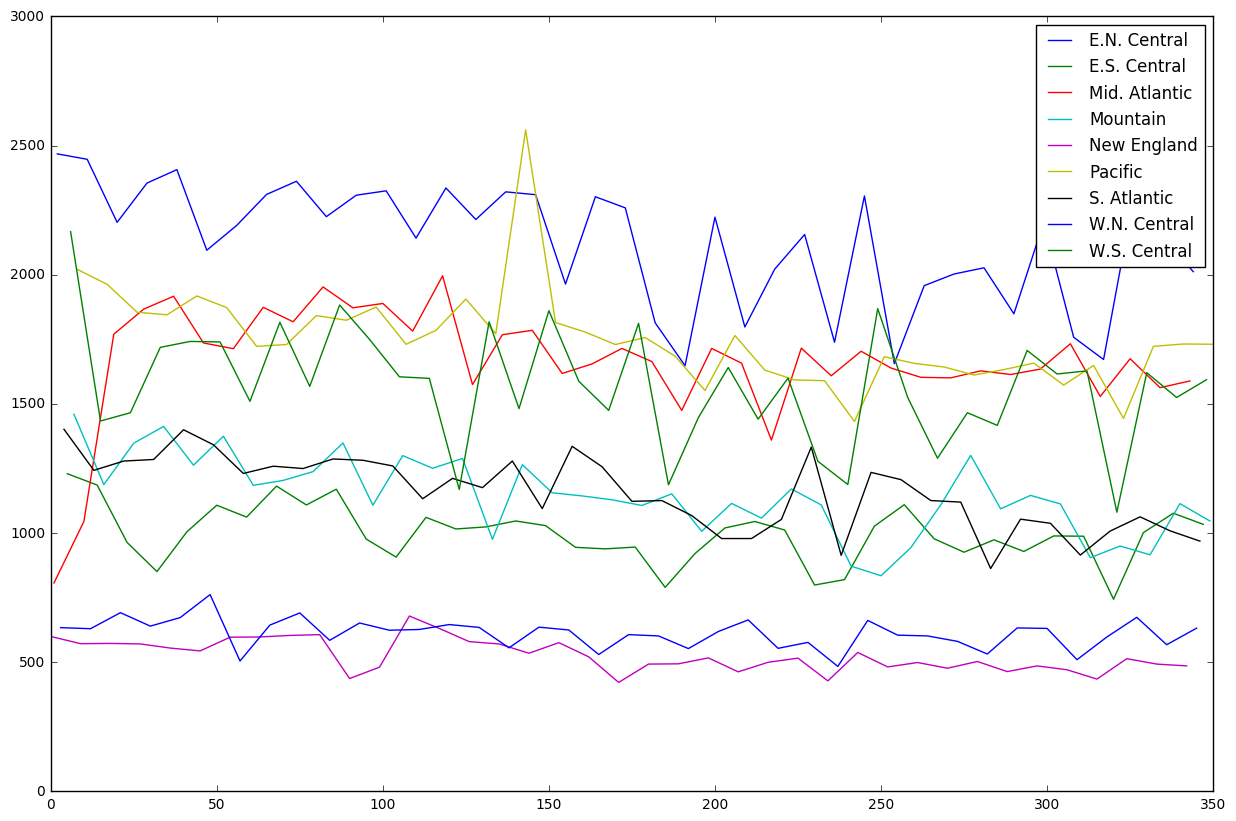

In [9]:
regions.groupby('Reporting Area')['All causes, by age (years), All Ages**'].plot(figsize=(15,10),legend=True)